In [ ]:
test_data = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).float()

Luego creamos una instacia del modelo, el optimizador y la función de costo. Se implementan funciones utilitarias para aplicarse sobre los minibatches de entrenamiento y validación.

Si tenemos acceso a una GPU podemos usar el atributo .cuda() o .to() para enviar el modelo y los datos a la GPU para acelerar los cálculos.

In [ ]:
mlp.eval()

  0%|          | 0/15 [00:00<?, ?it/s]

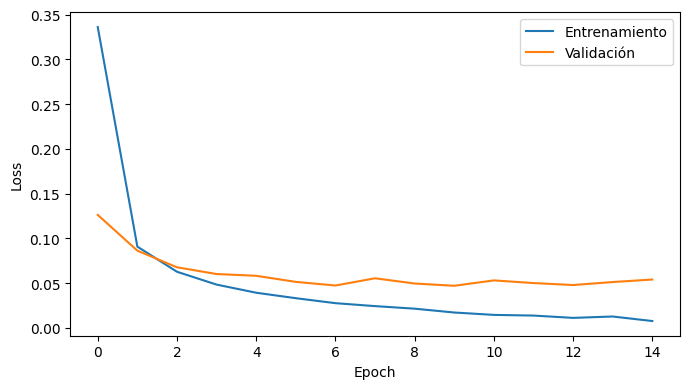

In [ ]:
with torch.no_grad():
    outputs = mlp(test_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
test_targets = np.array(test_targets)

mse = mean_squared_error(test_targets, predicted_labels)
r2 = r2_score(test_targets, predicted_labels)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# **Analizando las predicciones del modelo convolucional**

Primero recuperamos la red con menor costo de validación

In [ ]:
model = Lenet5()
model.load_state_dict(torch.load('best_model.pt')['model_state_dict'])

<All keys matched successfully>

Haremos la evaluación final del a red en el conjunto de prueba/test

Iteramos sobre el conjunto y guardamos las predicciones de la red

In [ ]:
test_loader = tdata.DataLoader(mnist_test_data, shuffle=False, batch_size=512)
test_targets = mnist_test_data.targets.numpy()
prediction_test = []
for mbdata, label in test_loader:
    logits = model(mbdata).detach()
    prediction_test.append(logits.argmax(dim=1).numpy())
prediction_test = np.concatenate(prediction_test)

Con esto podemos construir una matriz de confusión y un reporte usando las herramientas de sklearn

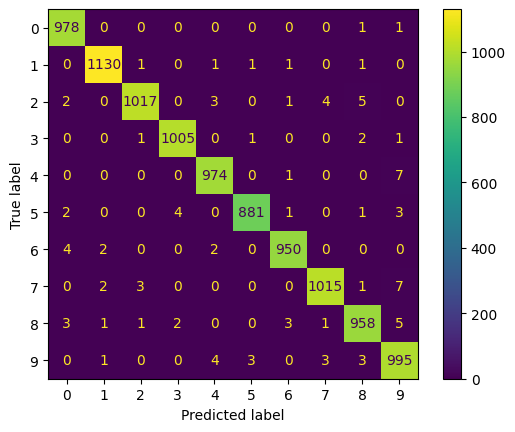

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(test_targets, prediction_test);

In [ ]:
print(classification_report(test_targets, prediction_test, digits=3))

              precision    recall  f1-score   support

           0      0.989     0.998     0.993       980
           1      0.995     0.996     0.995      1135
           2      0.994     0.985     0.990      1032
           3      0.994     0.995     0.995      1010
           4      0.990     0.992     0.991       982
           5      0.994     0.988     0.991       892
           6      0.993     0.992     0.992       958
           7      0.992     0.987     0.990      1028
           8      0.986     0.984     0.985       974
           9      0.976     0.986     0.981      1009

    accuracy                          0.990     10000
   macro avg      0.990     0.990     0.990     10000
weighted avg      0.990     0.990     0.990     10000



Luego de evaluar la red el siguiente paso es estudiar sus errores. Para problemas con imágenes es muy recomendable visualizar los ejemplos mal predichos por la red

Esto podría revelar

* Imágenes mal etiquetadas: Podemos cambiar su etiqueta y re-entrenar/re-evaluar

* Errores sistemáticos del modelo: Por ejemplo que siempre se equivoque con una clase u objeto en particular

Observemos algunos ejemplos mal clasificados

* Las imágenes corresponden a digit que no fueron predichos como digit

* El título de la imagen tiene la predicción por la red

Veamos 10 ejemplos erroneos para tres clases particulares:

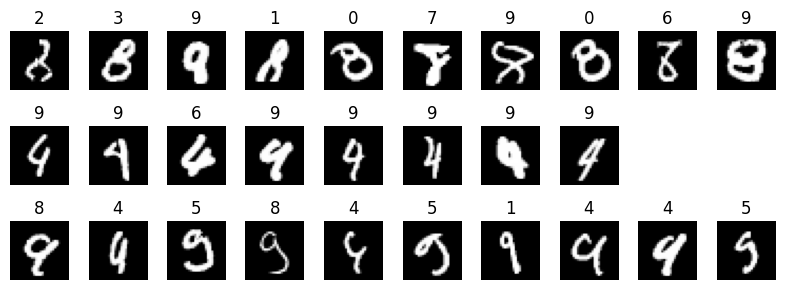

In [ ]:
fig, ax = plt.subplots(3, 10, figsize=(8, 3), tight_layout=True)

for k, digit in enumerate([8, 4, 9]):
    idx = np.where((test_targets == digit) & ~(prediction_test == digit))[0]
    for i in range(10):
        ax[k, i].axis('off')
        if i < len(idx):
            ax[k, i].set_title(prediction_test[idx[i]])
            ax[k, i].imshow(mnist_test_data[idx[i]][0].numpy()[0, :, :], cmap=plt.cm.Greys_r)